In [4]:
text = """
Napoleon Bonaparte (born Napoleone di Buonaparte; 15 August 1769 – 5 May 1821), and later known by his regnal name Napoleon I, was a French military and political leader who rose to prominence during the French Revolution and led several successful campaigns during the Revolutionary Wars. He was the de facto leader of the French Republic as First Consul from 1799 to 1804. 
"""

In [3]:
from py.rdf_grapher import RDFGrapher
from py.knowledge_graph_extractor import KnowledgeGraphExtractor


c:\projets personnels\text_to_rdf\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from py.gpt_coref_resolver import coreference_resolver

In [6]:
resolved_text = coreference_resolver(text)

In [7]:
print(resolved_text)

Napoleon Bonaparte (born Napoleone di Buonaparte; 15 August 1769 – 5 May 1821), et plus tard connu sous le nom de règne Napoleon I, était un leader militaire et politique français qui a gagné en notoriété pendant la Révolution française et a dirigé plusieurs campagnes réussies pendant les Guerres révolutionnaires. Napoleon Bonaparte était le leader de facto de la République française en tant que Premier Consul de 1799 à 1804.


In [8]:
kge = KnowledgeGraphExtractor()

In [9]:
triplet = kge.extract_triplet(resolved_text)

### exemple d'extractio  d'URI 

In [88]:
res = kge.extract_uri(triplet)

c:\projets personnels\text_to_rdf\venv\lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file c:\projets personnels\text_to_rdf\venv\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="html5lib"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


In [89]:
res

{'5 May 1821': '5 May 1821',
 'French Republic': 'http://dbpedia.org/resource/France',
 '15 August 1769': '15 August 1769',
 'French Revolution': 'http://dbpedia.org/resource/French_Revolution',
 'Napoleon Bonaparte': 'http://dbpedia.org/resource/Napoleon',
 'Revolutionary Wars': 'Revolutionary Wars',
 'First Consul': 'http://dbpedia.org/resource/French_Consulate'}

### exemple utilisation get_predicate_sparql

In [59]:
a_tuple = ("http://dbpedia.org/resource/Barack_Obama", "wasBornIn", "http://dbpedia.org/resource/Hawaii")


In [10]:
rdf_triplets = kge.transform_to_rdf_triplet(triplet)

In [11]:
print("******************************************* DEBUT TRIPLET SANS ENRICHISSEMENT *********************************************")
for triplet in triplet:
    print(triplet)
print("******************************************* FIN TRIPLET SANS ENRICHISSEMENT *********************************************")

******************************************* DEBUT TRIPLET SANS ENRICHISSEMENT *********************************************
(Napoleon Bonaparte, 'date of birth', 15 August 1769)
(Napoleon Bonaparte, 'date of death', 5 May 1821)
(Napoleon Bonaparte, 'position held', Premier Consul)
(République française, 'head of state', Napoleon Bonaparte)
(Premier Consul, 'country', République française)
******************************************* FIN TRIPLET SANS ENRICHISSEMENT *********************************************


In [12]:
triplets_enrichis = kge.enrichir_graph(rdf_triplets)
print("******************************************* DEBUT TRIPLET ENRICHIS *********************************************")
for t in triplets_enrichis:
    print(t)
print("******************************************* FIN TRIPLET ENRICHIS *********************************************")

******************************************* DEBUT TRIPLET ENRICHIS *********************************************
('http://dbpedia.org/resource/Napoleon', 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type', 'http://www.w3.org/2002/07/owl#Thing')
('http://dbpedia.org/resource/Napoleon', 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type', 'http://xmlns.com/foaf/0.1/Person')
('http://dbpedia.org/resource/Napoleon', 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type', 'http://dbpedia.org/ontology/Person')
('http://dbpedia.org/resource/Napoleon', 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type', 'http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#NaturalPerson')
('http://dbpedia.org/resource/Napoleon', 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type', 'http://www.wikidata.org/entity/Q19088')
('http://dbpedia.org/resource/Napoleon', 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type', 'http://www.wikidata.org/entity/Q215627')
('http://dbpedia.org/resource/Napoleon', 'http://www.w3.org/1999/02/

In [13]:
rdfgraphe = RDFGrapher()
rdf_graph_triplet = rdfgraphe.transform_triplets_to_rdflib(triplets_enrichis)

In [14]:
final_graph = rdfgraphe.get_final_graph(rdf_graph_triplet)


In [15]:
print(final_graph)

[a rdfg:Graph;rdflib:storage [a rdflib:Store;rdfs:label 'Memory']].



(process:20556): Pango-WARNING **: 13:20:10.165: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(process:20556): Pango-WARNING **: 13:20:10.184: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.

(process:20556): Pango-WARNING **: 13:20:10.197: couldn't load font "DejaVu Sans Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.



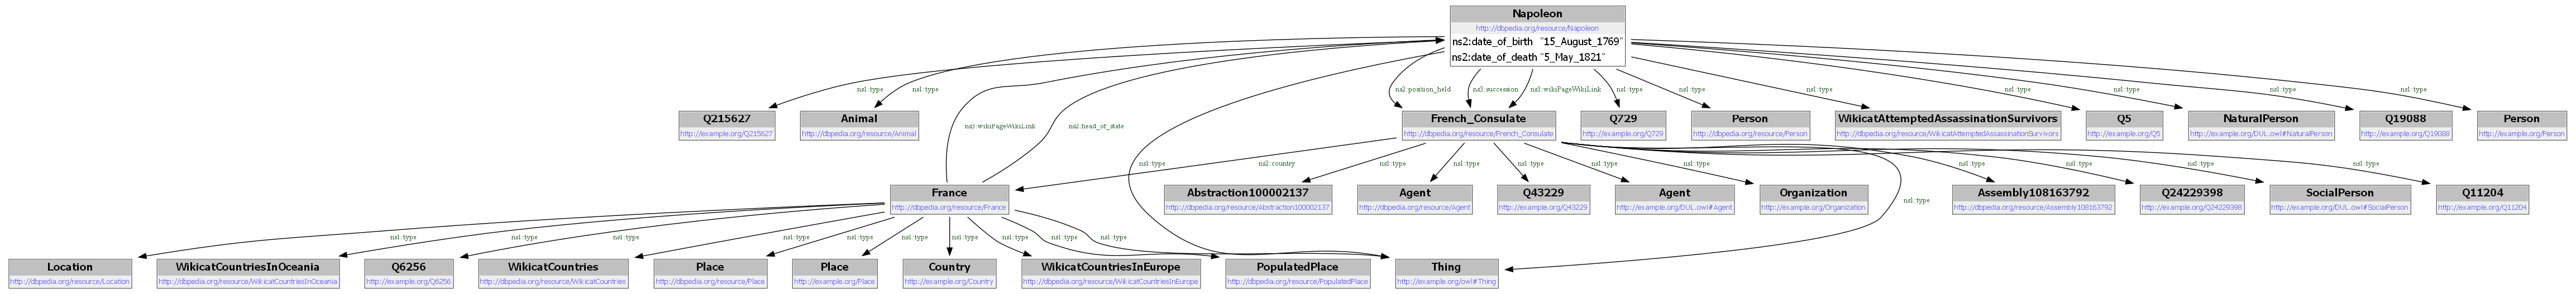

In [16]:
RDFGrapher.visualize(final_graph,'younes')

In [62]:
def main_without_coref_resolution(kge: KnowledgeGraphExtractor, text: str, image_name:str):
  resolved_text = coreference_resolver(text)
  triplets =  kge.extract_triplet(resolved_text)
  rdf_triplets = kge.transform_to_rdf_triplet(triplets)
  print("******************************************* DEBUT TRIPLET SANS ENRICHISSEMENT *********************************************")
  for triplet in triplets:
    print(triplet)
  print("******************************************* FIN TRIPLET SANS ENRICHISSEMENT *********************************************")
  triplets_enrichis = kge.enrichir_graph(rdf_triplets)
  print("******************************************* DEBUT TRIPLET ENRICHIS *********************************************")
  for t in triplets_enrichis:
    print(t)
  print("******************************************* FIN TRIPLET ENRICHIS *********************************************")
  rdfgraphe = RDFGrapher()
  rdf_graph_triplet = rdfgraphe.transform_triplets_to_rdflib(triplets_enrichis)
  final_graph = rdfgraphe.get_final_graph(rdf_graph_triplet)
  RDFGrapher.visualize(final_graph, image_name)
  return triplets

In [63]:
main_without_coref_resolution(kge,text,'napo')

AttributeError: 'KnowledgeGraphExtractor' object has no attribute 'transform_to_rdf_triplet'